In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("reviews.csv")
df.head()

,CourseCode,Experience,Improvement,Interesting,Practical,FairGradingCourse,GainedNewSkills,ManageableWorkloadCourse,FirstName,LastName,CourseDescription,CreatedAt
0,COR1305,Gained a lot of very practical excel skills bu...,find good teammates and have a project/client ...,False,True,False,True,False,Anonymous,NaN,"In this course, students acquire practical ski...",2022-06-28T21:19:26+08:00
1,COR1305,"To be honest, this mod may be very useful for ...",NIL,False,False,False,False,False,Anonymous,NaN,"In this course, students acquire practical ski...",2022-04-20T14:24:11+08:00
2,COR1305,SMA is one of the most useless courses for the...,"Out of everything you learn, approximately 5~1...",False,False,False,False,False,Anonymous,NaN,"In this course, students acquire practical ski...",2022-04-19T20:10:33+08:00
3,COR1305,Disclaimer: I took this module under Prof Mano...,I do feel that more assistance should be provi...,True,True,True,True,True,Anonymous,NaN,"In this course, students acquire practical ski...",2021-12-20T12:14:52+08:00
4,COR1305,"Content wise, it is rather okay with only 7 we...","Update content, as some of the exercises were ...",False,True,False,False,False,Anonymous,NaN,"In this course, students acquire practical ski...",2021-11-03T18:05:33+08:00


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CourseCode                443 non-null    object
 1   Experience                443 non-null    object
 2   Improvement               271 non-null    object
 3   Interesting               443 non-null    bool  
 4   Practical                 443 non-null    bool  
 5   FairGradingCourse         443 non-null    bool  
 6   GainedNewSkills           443 non-null    bool  
 7   ManageableWorkloadCourse  443 non-null    bool  
 8   FirstName                 443 non-null    object
 9   LastName                  3 non-null      object
 10  CourseDescription         443 non-null    object
 11  CreatedAt                 443 non-null    object
dtypes: bool(5), object(7)
memory usage: 26.5+ KB


,CourseCode,Experience,Improvement,Interesting,Practical,FairGradingCourse,GainedNewSkills,ManageableWorkloadCourse,FirstName,LastName,CourseDescription,CreatedAt
count,443,443,271,443,443,443,443,443,443,3,443,443
unique,58,441,203,2,2,2,2,2,4,3,58,442
top,COR-IS1702,Great mod that teaches web development. Very u...,NIL,True,True,True,True,True,Anonymous,Wan,Computational Thinking equips students to tack...,2021-06-27T22:16:06+08:00
freq,43,2,25,307,311,228,305,238,440,1,43,2


In [7]:
df.isnull().sum()

CourseCode                    0
Experience                    0
Improvement                 172
Interesting                   0
Practical                     0
FairGradingCourse             0
GainedNewSkills               0
ManageableWorkloadCourse      0
FirstName                     0
LastName                    440
CourseDescription             0
CreatedAt                     0
dtype: int64

In [8]:
df.dtypes

CourseCode                  object
Experience                  object
Improvement                 object
Interesting                   bool
Practical                     bool
FairGradingCourse             bool
GainedNewSkills               bool
ManageableWorkloadCourse      bool
FirstName                   object
LastName                    object
CourseDescription           object
CreatedAt                   object
dtype: object

In [11]:
df.corr(numeric_only=True)

,Interesting,Practical,FairGradingCourse,GainedNewSkills,ManageableWorkloadCourse
Interesting,1.000000,0.561515,0.538525,0.566785,0.383436
Practical,0.561515,1.000000,0.473390,0.648820,0.345622
FairGradingCourse,0.538525,0.473390,1.000000,0.468375,0.584339
GainedNewSkills,0.566785,0.648820,0.468375,1.000000,0.333743
ManageableWorkloadCourse,0.383436,0.345622,0.584339,0.333743,1.000000


In [14]:
import string
import re

df["cleanExperience"] = df["Experience"].apply(lambda x: x.lower())
df["cleanExperience"] = df["cleanExperience"].apply(lambda x: re.sub('\w*\d\w*','', x))
df["cleanExperience"] = df["cleanExperience"].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df["cleanExperience"] = df["cleanExperience"].apply(lambda x: re.sub(' +',' ',x))

for index,text in enumerate(df["cleanExperience"]):
  print(index, text)

0 gained a lot of very practical excel skills but do be warned the project requires you to find your own client and data which can not only be very challenging but the client may not expect the appropriate problem solving that your prof wants you to do best if you have connections with someone willing to provide data without high expectation for results and capable teammates or it will be very tough if your teammates cannot manage the workload and dump the rest of the project on you expect to have frequent communication with your client and needing to revise your model several times too as real life models are not as simple as what is taught in class
1 to be honest this mod may be very useful for your future work if your job demands a lot of excel skills however it is definitely challenging if you are a not a math person andor have no experience with excel before i took sma under prof wang hai in sem his classes are expensive but trust me they are worth the money prof is very very nice

In [17]:
import spacy

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
df["lemmatizedExperience"] = df["cleanExperience"].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df["lemmatizedExperience"].head()

0    gain lot practical excel skill warn project re...
1    honest mod useful future work job demand lot e...
2    sma useless course work world especially skill...
3    disclaimer take module prof manoj thulasidas m...
4    content wise okay week actual learning materia...
Name: lemmatizedExperience, dtype: object

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer="word")
data = cv.fit_transform(df["lemmatizedExperience"])
dfDtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
dfDtm.index = df["lemmatizedExperience"].index
dfDtm.head(3)

,ability,abit,able,absolute,absolutely,abstract,abstractinnature,abysmal,academic,academy,...,xlookup,yaos,yeah,year,yeow,yong,you,youtube,youtubecourseraother,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


ability                  4
abit                     4
able                    22
absolute                 2
absolutely               3
                        ..
yong                     1
you                      1
youtube                  6
youtubecourseraother     1
zero                     2
Length: 2045, dtype: int64


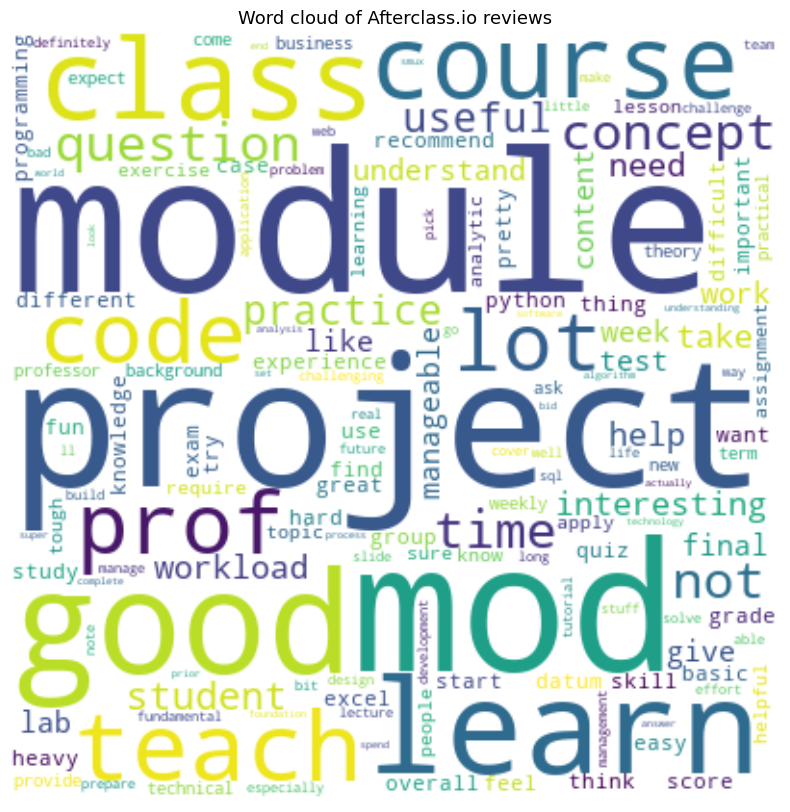

In [44]:
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

dfDtm = dfDtm.transpose()
print(dfDtm.sum(axis=0))
wc = WordCloud(width=400, height=400, max_words=150, background_color="white").generate_from_frequencies(dfDtm.sum(axis=0))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("\n".join(wrap("Word cloud of Afterclass.io reviews", 60)), fontsize=13)
plt.show()